In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [6]:
raw_data = pd.read_csv("C:Users/kan_a/OneDrive/Documents/Capstone/Potential_Datasets/forestfires.csv")

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [25]:
enc = LabelEncoder()
enc.fit(raw_data['month'])
enc.classes_
raw_data['month_encoded'] = enc.transform(raw_data['month'])

In [26]:
enc.fit(raw_data['day'])
enc.classes_
raw_data['day_encoded'] = enc.transform(raw_data['day'])

In [36]:
raw_data['class'] = raw_data['area'].apply(lambda x: 'fire' if x > 0 else 'no fire')
raw_data = raw_data[[col for col in raw_data.columns if col != 'class'] + ['class']]
raw_data = raw_data.drop(["X", "Y"], axis =1)
raw_data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_encoded,day_encoded,class
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,7,0,no fire
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,10,5,no fire
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,10,2,no fire
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,7,0,no fire
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,7,3,no fire


In [37]:
data = raw_data.replace(['no fire', 'fire'], [0,1])
data.head()


C:\Users\kan_a\AppData\Local\Temp\ipykernel_11360\2178765359.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = raw_data.replace(['no fire', 'fire'], [0,1])


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_encoded,day_encoded,class
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,7,0,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,10,5,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,10,2,0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,7,0,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,7,3,0


In [38]:
data.shape

(517, 14)

In [39]:
# include all rows of data in X and only columns 2-12
X = data.iloc[:,2:13]
# set Y, the target, to the last column for classification
Y = data.iloc[:,13]

In [42]:
#X.info()
#Y.info()

In [43]:
from keras.models import Sequential
from keras.layers import Dense

In [48]:
#create model 
model = Sequential()
#first layer
model.add(Dense(20, input_dim = 11, activation = 'relu'))
#second layer
model.add(Dense(10,  activation = 'relu'))
#3rd layer
model.add(Dense(10,  activation = 'relu'))
#4th layer
model.add(Dense(1,  activation = 'sigmoid'))

In [52]:
#compile model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 20)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 571 (2.23 KB)

 Trainable params: 571 (2.23 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
#fit model
history = model.fit(X, Y, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5428 - loss: 24.9255 - val_accuracy: 0.3918 - val_loss: 5.0207
Epoch 2/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5085 - loss: 2.0506 - val_accuracy: 0.4211 - val_loss: 1.7109
Epoch 3/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5352 - loss: 0.9751 - val_accuracy: 0.5614 - val_loss: 0.9814
Epoch 4/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5702 - loss: 0.7429 - val_accuracy: 0.5029 - val_loss: 1.0295
Epoch 5/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5333 - loss: 0.8018 - val_accuracy: 0.5263 - val_loss: 0.8810
Epoch 6/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5341 - loss: 0.7594 - val_accuracy: 0.6023 - val_loss: 0.7499
Epoch 7/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5971 - loss: 0.7207 - val_accuracy: 0.4620 - val_loss: 0.8814
Epoch 8/250
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6193 - loss: 0.6240 - val_accuracy: 0.6199 - val_loss: 0.

In [56]:
#evaluate model performance
scores = model.evaluate(X,Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9846 - loss: 0.0862  
compile_metrics: 97.10%


In [57]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

<function matplotlib.pyplot.show(close=None, block=None)>

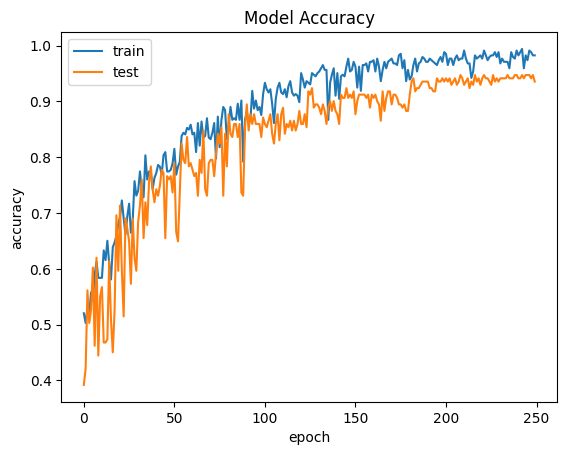

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

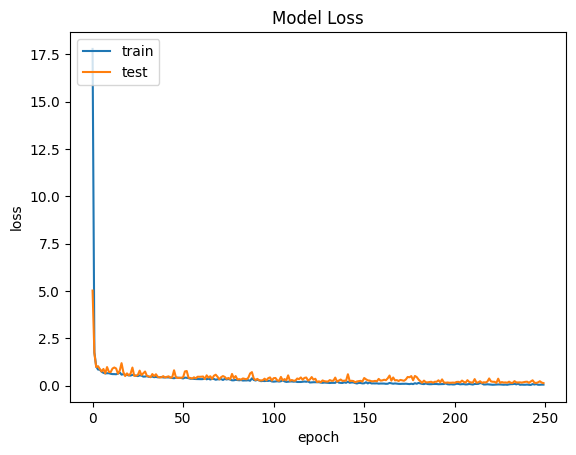

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show